In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') # Look Pretty

In [2]:
def drawLine(model, X_test, y_test, title):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression line
    # and displaying the R2 coefficient
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)
    
    print ("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print ("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print ("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])
    
    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)
    
    plt.show()

In [12]:
#
# TODO: Load up the data here into a variable called 'X'.
# As usual, do a .describe and a print of your dataset and
# compare it to the dataset loaded in a text file or in a
# spread sheet application
#
X = pd.read_csv('Datasets/life_expectancy.csv', sep="\t")
X.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


In [10]:
#
# TODO: Create your linear regression model here and store it in a
# variable called 'model'. Don't actually train or do anything else
# with it yet:
#
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
#
# TODO: Slice out your data manually (e.g. don't use train_test_split,
# but actually do the Indexing yourself. Set X_train to be year values
# LESS than 1986, and y_train to be corresponding WhiteMale age values.
#
# INFO You might also want to read the note about slicing on the bottom
# of this document before proceeding.
#
X_train = X[X['Year'] < 1986]['Year']
y_train = X[X['Year'] < 1986]['WhiteMale']

Est 2014 WhiteMale Life Expectancy:  80.8563542562
Est 2030 WhiteMale Life Expectancy:  85.3934938378
Est 2045 WhiteMale Life Expectancy:  89.6470621955


/Users/cuongpham/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


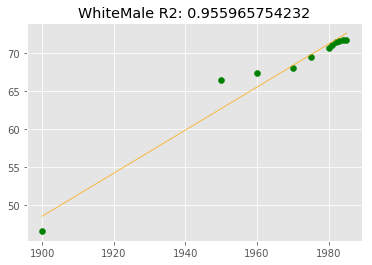

In [29]:
#
# TODO: Train your model then pass it into drawLine with your training
# set and labels. You can title it "WhiteMale". drawLine will output
# to the console a 2014 extrapolation / approximation for what it
# believes the WhiteMale's life expectancy in the U.S. will be...
# given the pre-1986 data you trained it with. It'll also produce a
# 2030 and 2045 extrapolation.
#
X_train = X_train.reshape(-1, 1)
model.fit(X_train, y_train)
drawLine(model, X_train, y_train, 'WhiteMale')

In [31]:
#
# TODO: Print the actual 2014 WhiteMale life expectancy from your
# loaded dataset
#
print(model.predict(2014))

[ 80.85635426]


Est 2014 BlackFemales Life Expectancy:  88.6988993981
Est 2030 BlackFemales Life Expectancy:  96.1143880768
Est 2045 BlackFemales Life Expectancy:  103.066408713


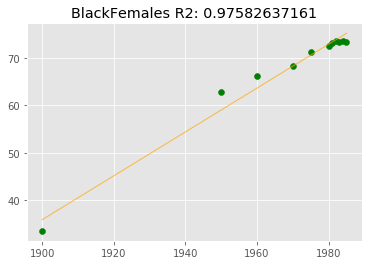

Predict BlackFemale life expectancy for 2014:  [ 88.6988994]


In [33]:
# 
# TODO: Repeat the process, but instead of for WhiteMale, this time
# select BlackFemale. Create a slice for BlackFemales, fit your
# model, and then call drawLine. Lastly, print out the actual 2014
# BlackFemale life expectancy
#
y_train_bf = X[X['Year'] < 1986]['BlackFemale']
model.fit(X_train, y_train_bf)
drawLine(model, X_train, y_train_bf, 'BlackFemales')
print('Predict BlackFemale life expectancy for 2014: ', model.predict(2014))

                 Year  WhiteMale  WhiteFemale  BlackMale  BlackFemale
Year         1.000000   0.974154     0.913907   0.960635     0.940429
WhiteMale    0.974154   1.000000     0.975164   0.987974     0.985009
WhiteFemale  0.913907   0.975164     1.000000   0.956689     0.994656
BlackMale    0.960635   0.987974     0.956689   1.000000     0.975922
BlackFemale  0.940429   0.985009     0.994656   0.975922     1.000000


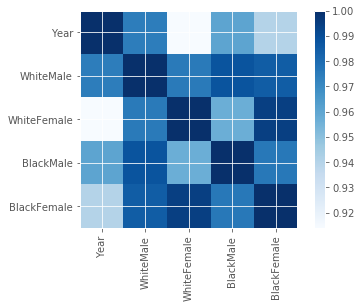

In [37]:
#
# TODO: Lastly, print out a correlation matrix for your entire
# dataset, and display a visualization of the correlation
# matrix, just as we described in the visualization section of
# the course
#
print(X.corr())
plt.imshow(X.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(X.columns))]
plt.xticks(tick_marks, X.columns, rotation='vertical')
plt.yticks(tick_marks, X.columns)

plt.show()